# Datos geográficos con Basemap

Una de las visualizaciones más resultonas en el mundo del Data Science son las de los datos geográficos.

La herramienta principal de Matplotlib para este tipo de visualización es el kit de herramientas Basemap, que es uno de los múltiples kits de herramientas de Matplotlib que se encuentran en `` mpl_toolkits ``.

Es cierto que Basemap es un tanto confuso y, a menudo, incluso las visualizaciones simples tardan mucho más en renderizarse de lo que cabría esperar.
Por ello, en algunos casos, soluciones más modernas, como la API de Google Maps, pueden ser una mejor opción para visualizaciones de mapas más intensivas.

Aún así, Basemap es una herramienta muy útil para llevar en nuestro cinturón de herramientas virtuales.
En este último notebook, mostraremos varios ejemplos de las posibilidades de mapas que tenemos en Matplotlib.

Para usarlo, deberemos instalarlo, lo cual se puede hacer o desde el propio Anaconda entrando en la parte de Environment y buscando la librería "basemap", o desde la terminal de anaconda con una simple instrucción:

```
$ conda install basemap
$ conda install -c conda-forge basemap-data-hires
```

Y para usarlo, simplemente añadiremos un import más:

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

Una vez que tengamos instalado e importado el kit de herramientas Basemap, tendríamos que instalar el paquete `` pillow `` para poder ejecutar este conjunto de herramientas en Python 3, que ya tendría que venir instalado por defecto con nuestra distribución de Anaconda.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


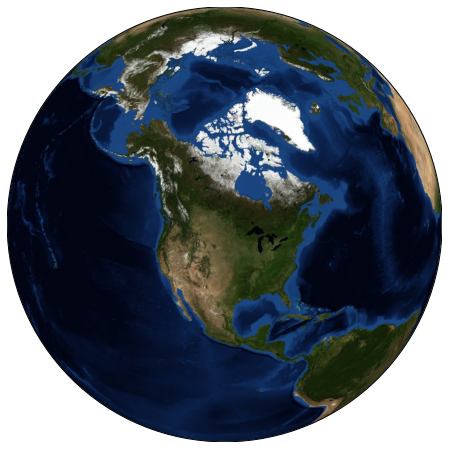

In [54]:
plt.figure(figsize=(8, 8))
m = Basemap(projection='ortho', resolution=None, lat_0=50, lon_0=-100)
m.bluemarble(scale=0.5);

El significado de los argumentos de `` Basemap ``, podemos verlo en la documentación, por lo que no nos centraremos en ello:

In [9]:
help(Basemap)

Help on class Basemap in module mpl_toolkits.basemap:

class Basemap(builtins.object)
 |  Basemap(llcrnrlon=None, llcrnrlat=None, urcrnrlon=None, urcrnrlat=None, llcrnrx=None, llcrnry=None, urcrnrx=None, urcrnry=None, width=None, height=None, projection='cyl', resolution='c', area_thresh=None, rsphere=6370997.0, ellps=None, lat_ts=None, lat_1=None, lat_2=None, lat_0=None, lon_0=None, lon_1=None, lon_2=None, o_lon_p=None, o_lat_p=None, k_0=None, no_rot=False, suppress_ticks=True, satellite_height=35786000, boundinglat=None, fix_aspect=True, anchor='C', celestial=False, round=False, epsg=None, ax=None)
 |  
 |  Methods defined here:
 |  
 |  __call__(self, x, y, inverse=False)
 |      Calling a Basemap class instance with the arguments lon, lat will
 |      convert lon/lat (in degrees) to x/y map projection
 |      coordinates (in meters).  If optional keyword ``inverse`` is
 |      True (default is False), the inverse transformation from x/y
 |      to lon/lat is performed.
 |      
 | 

Lo realmente útil de esta herramienta es que el globo terráqueo que vemos no es una mera imagen; sino que es un eje Matplotlib que comprende las coordenadas esféricas y que nos permite trazar fácilmente los datos en el mapa.

Por ejemplo, podemos usar una proyección de mapa diferente, acercarnos a América del Norte y trazar la ubicación de Seattle.
Usaremos una imagen etopo (que muestra características topográficas tanto en tierra como bajo el agua) como fondo del mapa:

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


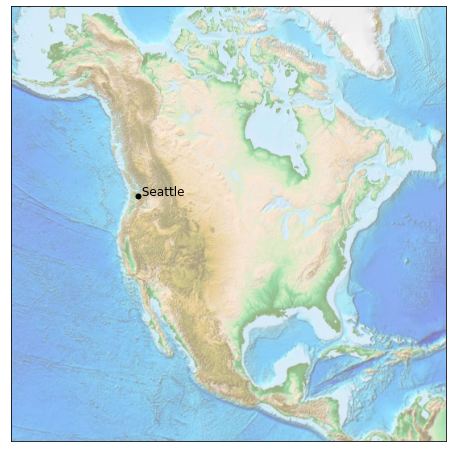

In [15]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution=None,
            width=8E6, height=8E6, 
            lat_0=45, lon_0=-100,)
m.etopo(scale=0.5, alpha=0.5)

# Mapeamos (long, lat) a (x, y) para graficar
x, y = m(-122.3, 47.6)
plt.plot(x, y, 'ok', markersize=5)
plt.text(x, y, ' Seattle', fontsize=12);

Esto nos da una idea deñ tipo de visualizaciones geográficas que son posibles con solo unas pocas líneas de Python.

A continuación, analizaremos las características del Basemap con más detalle, y veremos varios ejemplos de visualización con datos geográficos.
Usando estos breves ejemplos como plantilla, deberíamos poder crear casi cualquier visualización de mapa que se nos pase por la cabeza.

## Proyecciones de mapa

Lo primero que debemos decidir al usar mapas es qué proyección usar.
Como es sabido, es imposible proyectar un mapa esférico, como el de la Tierra, sobre una superficie plana sin distorsionarlo de alguna manera o romper su continuidad.
Estas proyecciones se han desarrollado a lo largo de la historia de la humanidad, por lo que hay muchas opciones.
Dependiendo del uso previsto de la proyección del mapa, existen ciertas características del mapa (como dirección, área, distancia, forma u otras consideraciones) que será útil mantener.

El paquete Basemap implementa varias docenas de estas proyecciones, todas referenciadas por un código de formato corto. A lo largo de este notebook, veremos ejemplos de los más comunes.

Comenzaremos definiendo una función para dibujar nuestro mapa mundial junto con las líneas de longitud y latitud, pero no deberemos pararnos a comprenderla, simplemente utilizarla en el futuro para demostrar el resto de casos:

In [20]:
from itertools import chain

def draw_map(m, scale=0.2):
    m.shadedrelief(scale=scale)
    
    # lats and longs are returned as a dictionary
    lats = m.drawparallels(np.linspace(-90, 90, 13))
    lons = m.drawmeridians(np.linspace(-180, 180, 13))

    lat_lines = chain(*(tup[1][0] for tup in lats.items()))
    lon_lines = chain(*(tup[1][0] for tup in lons.items()))
    all_lines = chain(lat_lines, lon_lines)
    
    for line in all_lines:
        line.set(linestyle='-', alpha=0.3, color='w')

### Proyecciones cilíndricas

Las proyecciones de mapas más simples son las proyecciones cilíndricas, en las que las líneas de latitud y longitud constantes se asignan a líneas horizontales y verticales, respectivamente.

Este tipo de mapeo representa bastante bien las regiones ecuatoriales, pero produce distorsiones extremas cerca de los polos.
El espaciado de las líneas de latitud varía entre diferentes proyecciones cilíndricas, lo que conduce a diferentes propiedades de conservación y diferentes distorsiones cerca de los polos.
En la siguiente figura se muestra un ejemplo de la proyección cilíndrica equidistante, que elige una escala de latitud que preserva las distancias a lo largo de los meridianos.

Otras proyecciones cilíndricas son las proyecciones de Mercator (``projection='merc'``) y las proyecciones cilíndricas de igual área (``projection='cea'``).

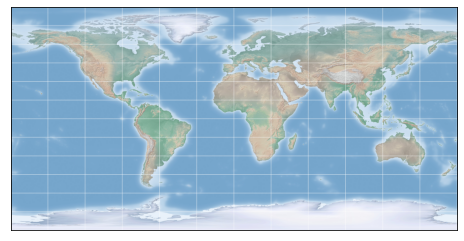

In [21]:
fig = plt.figure(figsize=(8, 6), edgecolor='w')
m = Basemap(projection='cyl', resolution=None,
            llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180, )
draw_map(m)

Los argumentos adicionales del Basemap para esta vista especifican la latitud (`` lat ``) y la longitud (`` lon ``) de la esquina inferior izquierda (`` llcrnr ``) y la esquina superior derecha (`` urcrnr ``) para el mapa deseado, en unidades de grados.

### Proyecciones pseudocilíndricas

Las proyecciones pseudocilíndricas reducen los problemas derivados de que los meridianos (líneas de longitud constante) permanezcan verticales; dando lugar a mejores propiedades cerca de los polos de la proyección.

La proyección de Mollweide (``projection='moll'``) es un ejemplo común de esto, en el que todos los meridianos son arcos elípticos.
Está construido para preservar el área a lo largo del mapa: aunque hay distorsiones cerca de los polos, el área de pequeños parches refleja el área real.
Otras proyecciones pseudocilíndricas son las proyecciones sinusoidales (``projection='sinu'``) y Robinson (``projection='robin'``).

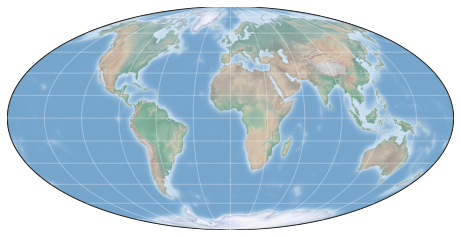

In [25]:
fig = plt.figure(figsize=(8, 6), edgecolor='w')
m = Basemap(projection='moll', resolution=None,
            lat_0=0, lon_0=0)
draw_map(m)

Estos parámetros extra que le pasamos a Basemap hacen referencia a la latitud central (``lat_0``) y longitud (``lon_0``) para el mapa deseado.

### Proyecciones de perspectiva

Las proyecciones de perspectiva se construyen usando una elección particular de punto de perspectiva, similar a si fotografiáramos la Tierra desde un punto particular en el espacio (un punto que, para algunas proyecciones, técnicamente se encuentra dentro de la Tierra).

Un ejemplo común es la proyección ortográfica (``projection='ortho'``), que muestra un lado del globo como se ve desde un espectador a una distancia muy larga. Como tal, solo puede mostrar la mitad del mundo a la vez.
Otras proyecciones basadas en perspectiva incluyen la proyección gnomónica (``projection='gnom'``) y la proyección estereográfica (``projection='stere'``).
Suelen ser las más útiles para mostrar pequeñas porciones del mapa.

A continuación, se muestra un ejemplo de proyección ortográfica:

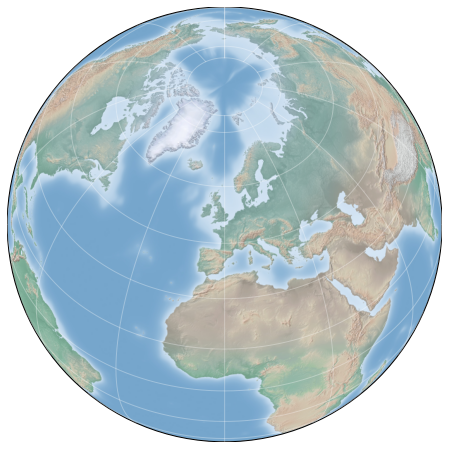

In [28]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='ortho', resolution=None,
            lat_0=50, lon_0=0)
draw_map(m);

### Proyecciones cónicas

Una proyección cónica proyecta el mapa en un solo cono, que luego se desenrolla.

Esto puede dar lugar a propiedades locales muy buenas, pero las regiones alejadas del punto de enfoque del cono pueden distorsionarse mucho.

Un ejemplo de esto es la proyección *Lambert Conformal Conic projection* (``projection='lcc'``), que hemos visto anteriormente en el mapa de América del Norte.
Proyecta el mapa en un cono dispuesto de tal manera que dos paralelos estándar (especificados en el mapa base por `` lat_1 `` y `` lat_2 ``) tienen distancias bien representadas, con escala disminuyendo entre ellos y aumentando fuera de ellos.


Otras proyecciones cónicas útiles son la proyección cónica equidistante (``projection='eqdc'``) y la proyección de áreas iguales de Albers (``projection='aea'``).

Las proyecciones cónicas, como las proyecciones en perspectiva, tienden a ser buenas opciones para representar áreas pequeñas y medianas del globo.

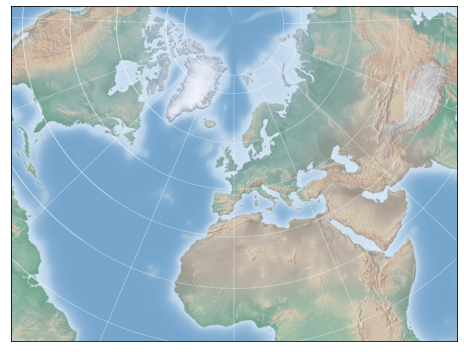

In [42]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution=None,
            lon_0=0, lat_0=50, lat_1=45, lat_2=55,
            width=1.6E7, height=1.2E7)
draw_map(m)

### Otras proyecciones

En el caso de que queramos hacer algo más avanzado con las visualiaciones geográficas, se podrían utilizar otros tipos de representaciones, que tendrán sus propiedades, ventajas y desventajas.
Lo más probable es que estén disponibles en el paquete [Basemap] (http://matplotlib.org/basemap/users/mapsetup.html).

## Trazando el fondo del mapa

Anteriormente, hemos visto los métodos ``bluemarble()`` y ``shadedrelief()`` para proyectar imágenes globales en el mapa, así como los métodos `` drawparallels()`` y ``drawmeridians() `` para dibujar líneas de latitud y longitud constantes.

El paquete Basemap contiene una variedad de funciones útiles para dibujar fronteras físicas como continentes, océanos, lagos y ríos, y fronteras políticas como países, estados y condados de USA.

A continuación, se muestran algunas de las funciones de dibujo de mapas disponiblesmás interesantes:

- **Límites físicos y cuerpos de agua**
  - ``drawcoastlines()``: Dibuja lineas consteras continentales
  - ``drawlsmask()``: Dibuja una máscara entre la tierra y el mar, para usar con la proyección de imágenes en uno u otro
  - ``drawmapboundary()``: Dibuja el límite del mapa, incluido el color de relleno de los océanos.
  - ``drawrivers()``: Dibuja ríos
  - ``fillcontinents()``: Rellena los continentes con un color determinado; opcionalmente puede pintar los lagos con otro color

- **Fronteras políticas**
  - ``drawcountries()``: Dibuja límites entre países
  - ``drawstates()``: Dibuja límites entre estados de USA
  - ``drawcounties()``: Dibuja los límites de los condados de USA

- **Características de los mapas**
  - ``drawgreatcircle()``: Dibuja un gran círculo entre dos puntos.
  - ``drawparallels()``: Dibuja líneas con latitud constante
  - ``drawmeridians()``: Dibuja líneas con longitud constante
  - ``drawmapscale()``: Dibuja la escala lineal en el mapa

- **Imágenes del mundo entero**
  - ``bluemarble()``: Proyecta la imagen NASA's blue marble en el mapa
  - ``shadedrelief()``: Proyecta una imagen en relieve sombreada en el mapa
  - ``etopo()``: Dibuja una imagen etopo de relieve en el mapa
  - ``warpimage()``: Proyecta una imagen proporcionada por el usuario en el mapa


Para las entidades basadas en límites, se debe establecer la resolución deseada al crear una imagen Basemap.
El argumento `` resolución `` de la clase `` Basemap `` establece el nivel de detalle en los límites, ya sea `` 'c' `` (crude), `` 'l'`` (low), ``'i'`` (intermediate), ``'h'`` (high), `` 'f'`` (full) o  ``None``, si no se utilizarán límites.
Esta elección es importante: establecer límites de alta resolución en un mapa global, por ejemplo, puede ser MUY lento.

A continuación, se muestra un ejemplo de cómo trazar límites tierra y mar, así como el efecto del parámetro de resolución.
Crearemos un mapa de alta y baja resolución de la Isla de Skye de Escocia, que se encuentra a 57,3 ° N, 6,2 ° W, y un mapa de 90.000 × 120.000 kilómetros lo muestra bien:

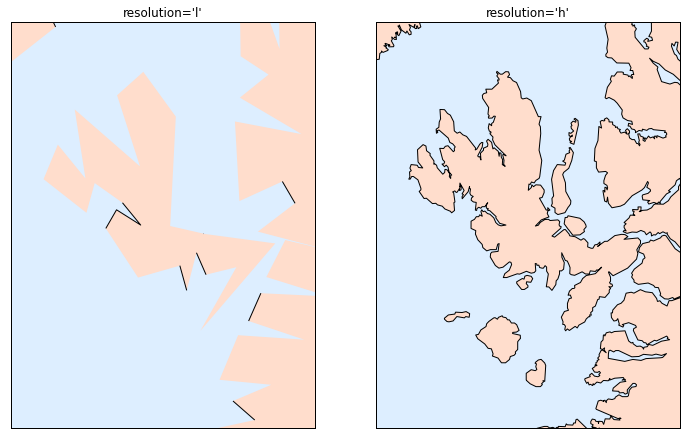

In [32]:
fig, ax = plt.subplots(1, 2, figsize=(12, 8))

for i, res in enumerate(['l', 'h']):
    m = Basemap(projection='gnom', lat_0=57.3, lon_0=-6.2,
                width=90000, height=120000, resolution=res, ax=ax[i])
    m.fillcontinents(color="#FFDDCC", lake_color='#DDEEFF')
    m.drawmapboundary(fill_color="#DDEEFF")
    m.drawcoastlines()
    ax[i].set_title("resolution='{0}'".format(res));

Tenga en cuenta que las costas de baja resolución no son adecuadas para este nivel de zoom, viendo la cantidad de accidentes geográficos presentes en estas costas, que necesitan de alta precisión pra ser bien representadas.

Sin embargo, el nivel bajo funcionaría bien para una vista global y sería MUCHO más rápido que cargar los datos de borde de alta resolución para todo el mundo.
Es posible que sea necesario experimentar un poco para encontrar el parámetro de resolución correcto para una vista determinada: la mejor ruta es comenzar con un gráfico rápido de baja resolución y aumentar la resolución según sea necesario.

## Pintando datos en los mapas

Quizás la pieza más útil del kit de herramientas de Basemap sea la capacidad de sobretrazar una variedad de datos en un mapa.

Para un trazado y texto simples, cualquier función `` plt `` funciona en el mapa; puede usar la instancia de `` Basemap `` para proyectar coordenadas de latitud y longitud en coordenadas `` (x, y) `` para trazar con `` plt ``, como vimos anteriormente en el ejemplo de Seattle.

Además de esto, hay muchas funciones específicas del mapa disponibles como métodos de la instancia de `` Basemap ``.
Estos funcionan de manera muy similar a sus contrapartes estándar de Matplotlib, pero tienen un argumento booleano adicional `` latlon ``, que si se establece en `` True`` le permite pasar latitudes y longitudes sin procesar al método, en lugar de proyectar `` (x , y) `` coordenadas.

Algunos de estos métodos específicos de mapas son:

- ``contour()``/``contourf()`` : Mapa de líneas de contorno
- ``imshow()``: Dijuja una imagen
- ``pcolor()``/``pcolormesh()`` : Dibuja un diagrama de pseudocolor para mallas irregulares/regulares
- ``plot()``: Dibuja líneas y / o marcadores.
- ``scatter()``: Dibuja puntos con marcadores
- ``quiver()``: Dibuja vectores
- ``barbs()``: Dibuja elementos de viento.
- ``drawgreatcircle()``: Dibuja un gran círculo.

Veremos ejemplos a medida avancemos. Para más información, incluyendo otros gráficos, revisa la [documentación de Basemap](http://matplotlib.org/basemap/).

## Ejemplo: Ciudades de California

Recuerda que en el notebook de las leyendas utilizamos el tamaño y el color en un diagrama de dispersión para transmitir más información sobre la ubicación, el tamaño y la población de las ciudades de California.

Ahora, crearemos este gráfico nuevamente, pero usando Basemap para poner los datos en contexto.

Empezamos cargando los datos, como hicimos antes:

In [37]:
import pandas as pd
cities = pd.read_csv('california_cities.csv')

lat = cities['latd'].values
lon = cities['longd'].values
population = cities['population_total'].values
area = cities['area_total_km2'].values

A continuación, configuramos la proyección del mapa, dispersamos los datos y luego creamos una barra de colores y una leyenda:

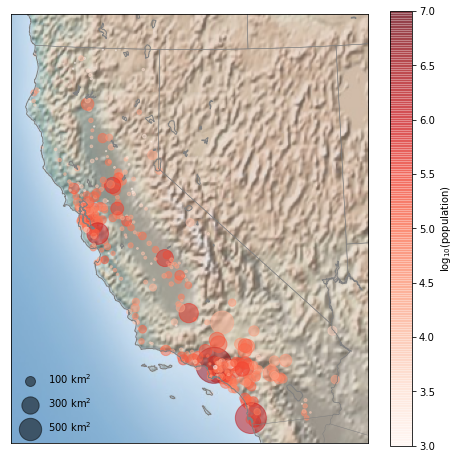

In [52]:
# 1. Dibujamos la base del mapa
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution='h', 
            lat_0=37.5, lon_0=-119,
            width=1E6, height=1.2E6)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

# 2. Dispersión de puntos, dejando color y tamaño como 2 dimensiones extra
m.scatter(lon, lat, latlon=True,
          c=np.log10(population), s=area,
          cmap='Reds', alpha=0.5)

# 3. colorbar y legend
plt.colorbar(label=r'$\log_{10}({\rm population})$')
plt.clim(3, 7)

# Leyenda sin datos
for a in [100, 300, 500]:
    plt.scatter([], [], c='k', alpha=0.5, s=a,
                label=str(a) + ' km$^2$')
plt.legend(scatterpoints=1, frameon=False,
           labelspacing=1, loc='lower left');

Esto nos muestra aproximadamente dónde se han asentado poblaciones más grandes en California: se agrupan cerca de la costa en las áreas de Los Ángeles y San Francisco, se extienden a lo largo de las carreteras en el valle central y evitan casi por completo las regiones montañosas a lo largo de las fronteras del estado.

Si quisiéramos representar España, nos faltarían los datos de poblaciones en base a longitud y latitud. Sin embargo, si sólo quisiéramos hacer al visualización del mapa tal cual, os bastaría con cambiar únicamente dónde estamos centrados:

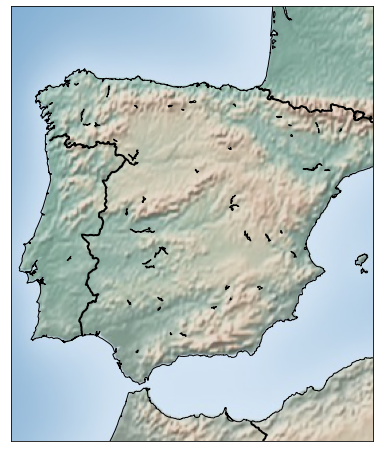

In [59]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution='h', 
            lat_0=40, lon_0=-4,
            width=1E6, height=1.2E6)
m.shadedrelief()
m.drawcoastlines(color='k', linewidth=1)
m.drawcountries(color='k', linewidth=2)

## Ejercicio

Repite las diferentes proyecciones que hemos visto durante la teoría pero centradas en España, para lo que deberás cambiar la longitud y latitud.

## Ejercicio

Pues resulta que al final sí que hemos conseguido un mapa con la población de los municipios de España ("poblacion_espana.xls"). Léetelo y representa la población en función de sus coordenadas, utilizando para ello un ``scatter``, donde el tamaño se corresponde con la cantidad de gente que habite ese municipio y el color con la altitud del mismo.

In [79]:
import pandas as pd

df = pd.read_excel("poblacion_espana.xls", skiprows=2)
# df = df[['Población', 'Latitud', 'Longitud', 'Habitantes']]
lon = df['Longitud'].values
lat = df['Latitud'].values
population = df['Habitantes'].values
altitud = df['Altitud'].values
df.iloc[:2]

,Comunidad,Provincia,Población,Latitud,Longitud,Altitud,Habitantes,Hombres,Mujeres
0,Andalucía,Almería,Abla,37.14114,-2.780104,871.1684,1504,783,721
1,Andalucía,Almería,Abrucena,37.13305,-2.797098,976.9387,1341,682,659


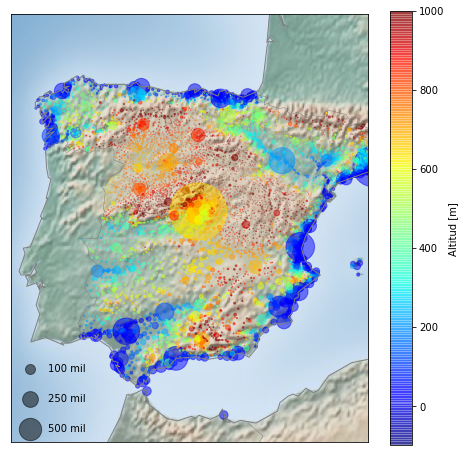

In [95]:
# 1. Dibujamos la base del mapa
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution='l', 
            lat_0=40, lon_0=-4,
            width=1E6, height=1.2E6)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

# 2. Dispersión de puntos, dejando color y tamaño como 2 dimensiones extra
m.scatter(lon, lat, latlon=True, c=altitud, s=population/1000,
          cmap='jet', alpha=0.5)
# m.scatter(lon, lat, latlon=True, c=altitud, s=np.log(population),
#           cmap='jet', alpha=0.5)

# # 3. colorbar y legend
plt.colorbar(label=r'Altitud [m]')
plt.clim(-100, 1000)

# Leyenda sin datos (miles de personas)
for pop in [100, 250, 500]:
    plt.scatter([], [], c='k', alpha=0.5, s=pop,
                label=str(pop) + ' mil')
plt.legend(scatterpoints=1, frameon=False,
           labelspacing=2, loc='lower left');